In [1]:
import pandas as pd
import numpy as np

In [4]:
import yfinance as yf

In [58]:

train_start='2000-01-01'
train_end='2022-12-31'
tickers = ['^GSPC']
     
sp = yf.download(tickers,start=train_start,end=train_end,interval = "1D")


[*********************100%***********************]  1 of 1 completed


In [59]:
sp.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [60]:
sp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [61]:
sp['dollarxvolume'] = sp['Close']*sp['Volume']

In [62]:
sp

,Open,High,Low,Close,Adj Close,Volume,dollarxvolume
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1.355974e+12
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1.412015e+12
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1.521990e+12
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1.532988e+12
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1.766089e+12
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,1.083962e+13
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,1.160378e+13
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,1.166563e+13


In [128]:
from tqdm import tqdm
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[dv_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)): # i = count and x= value 
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [162]:
dollar_M = 500000000000000
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(sp, 'dollarxvolume', dollar_M)


dollar threshold: 500,000,000,000,000


100%|██████████| 5787/5787 [00:00<00:00, 723276.54it/s]


In [163]:
dv_bar_df

,Open,High,Low,Close,Adj Close,Volume,dollarxvolume
Date,,,,,,,
2001-05-01,1249.459961,1266.469971,1243.550049,1266.439941,1266.439941,1181300000,1.496046e+12
2002-09-24,833.700012,833.700012,817.380005,819.289978,819.289978,1670240000,1.368411e+12
2004-03-05,1154.869995,1163.229980,1148.770020,1156.859985,1156.859985,1398200000,1.617522e+12
2005-05-02,1156.849976,1162.869995,1154.709961,1162.160034,1162.160034,1980040000,2.301123e+12
2006-02-13,1266.989990,1266.989990,1258.339966,1262.859985,1262.859985,1850080000,2.336392e+12
...,...,...,...,...,...,...,...
2022-06-16,3728.179932,3728.179932,3639.770020,3666.770020,3666.770020,5644930000,2.069866e+13
2022-07-29,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,4616360000,1.906691e+13
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,3932.689941,4224550000,1.661385e+13


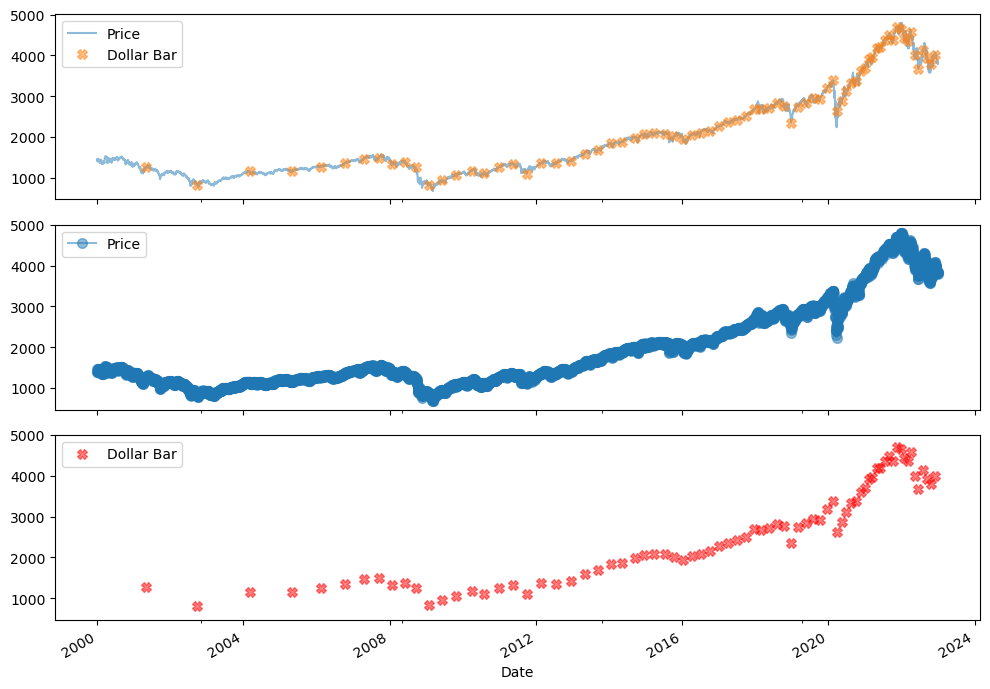

In [164]:
import matplotlib.pyplot as plt
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='Price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='Price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(sp['Close'], dv_bar_df['Close'], 'Dollar Bar', alpha=0.5, markersize=7)

Reference: - 

https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/blob/master/notebooks/Tick%2C%20Volume%2C%20Dollar%20Volume%20Bars.ipynb

Advances in Financial Machine Learning - Book by Marcos López de Prado

Machine Learning for Algorithmic Trading - Book by Stefan Jansen
